## <center> TOÁN THỐNG KÊ VÀ ỨNG DỤNG CHO CÔNG NGHỆ THÔNG TIN </center>
# <center> ĐỒ ÁN 1 - IMAGE COMPRESSION </center>

<center> MSSV: 21127202 - Họ và tên: Trần Minh Hải Uyên </center>

## Ý tưởng thực hiện

### 1. Thuật toán K-means clustering (Phân cụm K-means)
* Đây là thuật toán cơ bản của Unsupervised learning (Học không giám sát)
* Cho trước một tập dữ liệu không có nhãn (Label), ta sẽ <b> phân loại các nhãn này thành K cụm (cluster) sao cho dữ liệu trong từng cụm có tính chất tương đồng với nhau</b>

### 2. Ý tưởng thuật toán
* Đầu vào của thuật toán bao gồm <b>dữ liệu hình ảnh "img_2d"</b> và <b>số lượng cụm cần tìm "K"</b>. Dữ liệu ra của thuật toán gồm <b>các trung tâm "centroids"</b> và <b>nhãn "index" tương ứng cho từng điểm dữ liệu</b>.

* <b> <i> Các bước của thuật toán K-means clustering: </b> </i>

1. Khởi tạo K trung tâm ban đầu bằng cách chọn<b> K điểm dữ liệu ngẫu nhiên </b>.
2. <b>Phân loại mỗi điểm dữ liệu vào cụm có trung tâm gần nhất. </b>
3. Kiểm tra xem việc <b>phân loại dữ liệu vào các cụm có thay đổi </b> so với vòng lặp trước không. Nếu không có thay đổi, dừng thuật toán.
4. <b>Cập nhật trung tâm của mỗi cụm bằng cách tính trung bình các điểm dữ liệu </b> đã được phân loại vào cụm đó.
5. <b>Quay lại bước 2.

* Trong thuật toán, việc phân loại dữ liệu vào các cụm được thực hiện bằng cách tính toán khoảng cách giữa điểm dữ liệu và trung tâm của mỗi cụm, và gán điểm dữ liệu vào cụm có khoảng cách nhỏ nhất. Quá trình này tiếp tục cho đến khi không có thay đổi trong việc phân loại dữ liệu hoặc khi đạt đến số lần lặp tối đa.

* Kết quả cuối cùng của thuật toán là các trung tâm cuối cùng và vector nhãn chỉ số tương ứng cho mỗi điểm dữ liệu, cho biết nó thuộc vào cụm nào.

## Mô tả các hàm

### 1. Các hàm phụ

* <b> Hàm đọc thông tin ảnh </b>

In [1]:
def Input(ImageName): #Read numpy array from the image
    img = Image.open(ImageName)
    numpydata = asarray(img)
    return numpydata

* <b> Hàm đổi ma trận điểm ảnh từ 3 chiều sang 2 chiều và ngược lại </b>

In [2]:
def Reshaping2d(img_3d): #Reshape from 3d to 2d matrix
    img_shape = img_3d.shape
    img_2d = img_3d.reshape(img_shape[0]*img_shape[1],img_shape[2])
    print(img_2d)
    print(img_3d.shape)
    print(img_2d.shape)
    return img_2d

In [3]:
def Reshaping3d(img_2d,shape_3d): #Reshape from 2d to 3d matrix
    img_3d = img_2d.reshape((shape_3d[0],shape_3d[1],shape_3d[2]))
    return img_3d

* <b> Hàm tính khoảng cách Euclid giữa hai điểm A,B theo công thức bên dưới, với A,B là hai điểm A(xA,yA) và B(xB,yB) </b>

$\sqrt{(xA - xB)^2 + (yA - yB)^2}$

In [4]:
def EuclideanDistance(a,b):
    d = np.square(a[0] -b[0]) + np.square(a[1] - b[1])
    return (np.sqrt(d))

* <b> Hàm xuất hình ảnh theo 3 định dạng png/pdf/jpg, và xuất hình ảnh ra màn hình bằng thư viện hỗ trợ matplotlib </b>

File xuất ra sẽ có dạng: "<Tên file gốc>_<Số lượng màu>colours.png/pdf/jpg"

In [5]:
def Output(ImageType,numpydata,FileName,k_clusters):
    if ImageType == 'png':
        FinalName = FileName[0] + '_' + str(k_clusters) + 'colours' + '.png'
    if ImageType == 'pdf':
        FinalName = FileName[0] + '_' + str(k_clusters) + 'colours' + '.pdf'
    if ImageType == 'jpg':
        FinalName = FileName[0] + '_' + str(k_clusters) + 'colours' + '.jpg'
    data = Image.fromarray(numpydata)
    data.save(FinalName)
    plt.imshow(numpydata)
    plt.show()

### 2. Các hàm của thuật toán K-means

### Hàm khởi tạo k điểm trung tâm (centroids)
Hàm này sử dụng phương pháp <b>chọn ngẫu nhiên một tập hợp nhỏ các điểm dữ liệu và tính trung bình của chúng để tạo ra các trung tâm ban đầu</b>, đưa ra một ước lượng sơ bộ về vị trí ban đầu của các cụm trước khi thuật toán K-means bắt đầu tìm hiểu và điều chỉnh trung tâm dựa trên phân bố của các điểm dữ liệu.

#### Đầu vào của hàm bao gồm:

* <b>img_2d</b>: Một mảng 2D chứa dữ liệu hình ảnh, với mỗi hàng là một điểm dữ liệu.
* <b>k_clusters</b>: Số lượng cụm (clusters) mong muốn.

#### Khởi tạo các giá trị ban đầu:

* <b>m, n = img_2d.shape</b>: Lấy số hàng và số cột của mảng img_2d.
* <b>centroids = np.zeros((k_clusters, n))</b>: Khởi tạo một mảng <b>centroids</b> có kích thước<b> k*n, với tất cả các giá trị ban đầu là 0</b>. Mảng này sẽ lưu trữ các giá trị của các centroids ban đầu cho từng cụm.

#### Khởi tạo trung tâm cho mỗi cụm:

* Với mỗi cụm <b>i</b> trong khoảng từ <b>0 đến k_clusters - 1</b>, thực hiện các bước sau:

** <b>ranIndices = np.random.choice(m, size=10, replace=False)</b>: Chọn ngẫu nhiên 10 chỉ số không trùng lặp. Điều này được thực hiện bằng cách sử dụng hàm np.random.choice với tham số size=10 và replace=False.

** <b>centroids[i] = np.mean(img_2d[ranIndices], axis=0):</b> Tính trung bình các giá trị của các điểm dữ liệu tương ứng với các chỉ số <b>ranIndices</b>, theo trục axis=0. Điều này sẽ tính toán giá trị trung bình của các cột trong mảng <b>img_2d</b> và gán vào trung tâm của cụm <b>i trong mảng <b>centroids</b>.
* Trả về mảng <b>centroids</b> chứa các trung tâm ban đầu cho các cụm.


In [6]:
def Initialize(img_2d,k_clusters):
    m, n = img_2d.shape
    # centroids is the array of assumed means or centroids.
    centroids = np.zeros((k_clusters, n)) 
    # initialize random centroids.
    for i in range(k_clusters):
        #choose 10 randoms from the 1d array
        ranIndices = np.random.choice(m, size=10, replace=False) 
        #calculate avg value of each centroids
        centroids[i] = np.mean(img_2d[ranIndices], axis=0)
    return centroids

### Hàm thuật toán K-means
#### Đầu vào của thuật toán bao gồm:

* <b>img_2d</b>: Một mảng 2D chứa dữ liệu hình ảnh, với mỗi hàng là một điểm dữ liệu.
centroids: Một mảng chứa các centroid ban đầu cho các cụm. Mỗi centroid là một điểm trong không gian đặc trưng của dữ liệu.
* <b>k_clusters</b>: Số lượng cụm (clusters) mong muốn.
* <b>max_iter</b>: Số lượng lần lặp tối đa cho thuật toán.

#### Khởi tạo các giá trị ban đầu:

* <b>m, n = img_2d.shape</b>: Lấy số hàng và số cột của mảng img_2d.
* <b>index = np.zeros(m)</b>: Khởi tạo một mảng<b> index </b>có độ dài <b>m với các giá trị ban đầu là 0</b>. Mảng này lưu chỉ số của cụm mà mỗi điểm dữ liệu thuộc về.

#### Bước lặp chính của thuật toán:

* <b>while max_iter > 0</b>: Lặp lại cho đến khi số lần lặp tối đa max_iter được đạt.
* Với mỗi điểm dữ liệu <b>j trong<b> img_2d, thuật toán tìm cụm gần nhất:

** Khởi tạo <b>min_dist </b>với giá trị vô cùng lớn <b>(float('inf'))</b>.

** Với mỗi cụm <b>k</b>, tính khoảng cách Euclidean giữa điểm dữ liệu <b>j</b> và <b>centroid</b> của cụm k.

** Nếu khoảng cách nhỏ hơn hoặc bằng <b>min_dist</b>, cập nhật <b>min_dist </b>và gán <b>temp</b> là chỉ số của cụm k.

** Lưu chỉ số của cụm tương ứng với điểm dữ liệu <b>j</b> vào mảng <b>index</b>.

* Cập nhật <b>centroid</b> cho từng cụm:

** Với mỗi cụm k, tìm tất cả các điểm dữ liệu thuộc về cụm đó và lưu chúng vào mảng <b>cluster_points</b>.

** Nếu có ít nhất một điểm dữ liệu thuộc về cụm đó, tính trung bình các điểm trong <b>cluster_points</b> để xác định <b>centroid</b> mới cho cụm k và cập nhật vào <b>centroids</b>.

* Giảm số lần lặp tối đa <b>max_iter</b> đi 1 đơn vị.
* Trả về các <b>centroid</b> cuối cùng và mảng <b>index</b> chứa chỉ số cụm tương ứng với mỗi điểm dữ liệu.

In [7]:
def Kmeans(img_2d, centroids, k_clusters, max_iter):
    # max_iter the number of iterations
    m, n = img_2d.shape
    # these are the index values that correspond to the cluster to
    # which each pixel belongs to.
    index = np.zeros(m)
    # k-means algorithm.
    while max_iter > 0:
        for j in range(m):
            # initialize minimum value to a large value
            min_dist = float('inf')
            temp = None

            for k in range(k_clusters):
                a = (img_2d[j, 0], img_2d[j, 1])
                b = (centroids[k, 0], centroids[k, 1])

                if EuclideanDistance(a,b) <= min_dist:
                    min_dist = EuclideanDistance(a,b)
                    temp = k
                    index[j] = k
                    
        for k in range(k_clusters):
            cluster_points = img_2d[index == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
        max_iter -= 1
    return centroids, index

### Hàm nén hình ảnh
Từ hai ma trận thu thập được ở thuật toán K-means phía trên, ánh xạ mỗi điểm dữ liệu trong <b>index</b> vào giá trị tương ứng trong <b>centroids</b>, từ đó ta thu được một ma trận 2 chiều hoàn chỉnh của hình đã được nén.

* Ép kiểu từng phần tử trong <b>centroids</b> lại thành kiểu dữ liệu <b>np.uint8</b> để hỗ trợ cho việc in ảnh trong <b>matplotlib</b>

In [8]:
def Compress(centroids, index):
    centroid = np.array(centroids.astype(np.uint8))
    assign = centroid[index.astype(int)]
    return assign

### 3. Hàm chính của chương trình

<b> Hàm chính sẽ làm các chức năng sau: </b>
* Nhận tên file hình ảnh từ người dùng<b>ImageName</b>, tách tên file ra khỏi đuôi <b>FileName</b>
* Chuyển hình ảnh thành ma trận 3 chiều <b>img_3d</b>
* Lưu trữ kích thước gốc của ma trận 3 chiều của ảnh <b>shape_3d</b>
* Nhận số lượng cluster từ người dùng <b>k_clusters</b>
* Thay đổi kích thước mảng 3 chiều -> 2 chiều <b>img_2d</b>
* Nhận kết quả trả về từ thuật toán Kmeans: Mảng thông tin các điểm center <b>centroids</b> và mảng phân cụm các điểm <b>index</b>
* Từ 2 mảng trên nén lại thành một mảng 2 chiều hoàn chỉnh <b>compress</b>
* Thay đổi kích thước từ về 3 chiều như ban đầu <b>reshaped</b>
* Nhận loại file hình ảnh từ input người dùng để cho ra file output hoàn chỉnh <b>ImageType</b>

In [ ]:
if __name__ == "__main__":
    ImageName = input("Please enter the input name of a file: ")
    img_3d = Input(ImageName)
    FileName = ImageName.split('.')
    shape_3d = img_3d.shape
    k_clusters = int(input("Please enter the number of colors: "))
    img_2d = Reshaping2d(img_3d)
    centroids = Initialize(img_2d,k_clusters)
    centroids,index = Kmeans(img_2d,centroids,k_clusters,5)
    compress = Compress(centroids,index)
    reshaped = Reshaping3d(compress,shape_3d)
    ImageType = input("Please enter the type of output file (pdf/png/jpg): ")
    Output(ImageType,reshaped,FileName,k_clusters)

## Kết quả thực tế

### Hình ảnh gốc (1280  x 960 px)

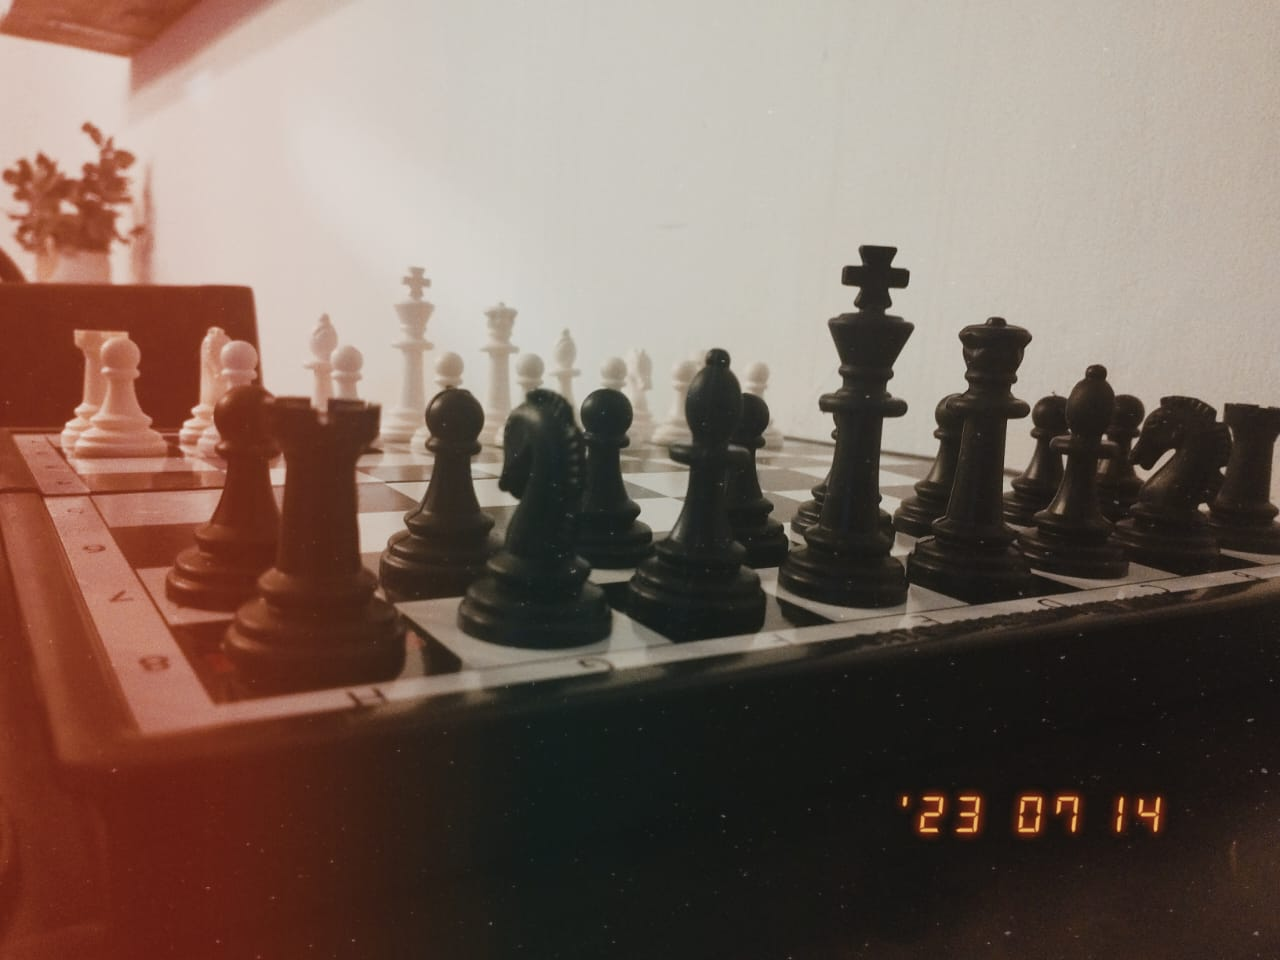

### Hình ảnh kết quả

#### Max iteration = 5

* <b> k = 3 </b>

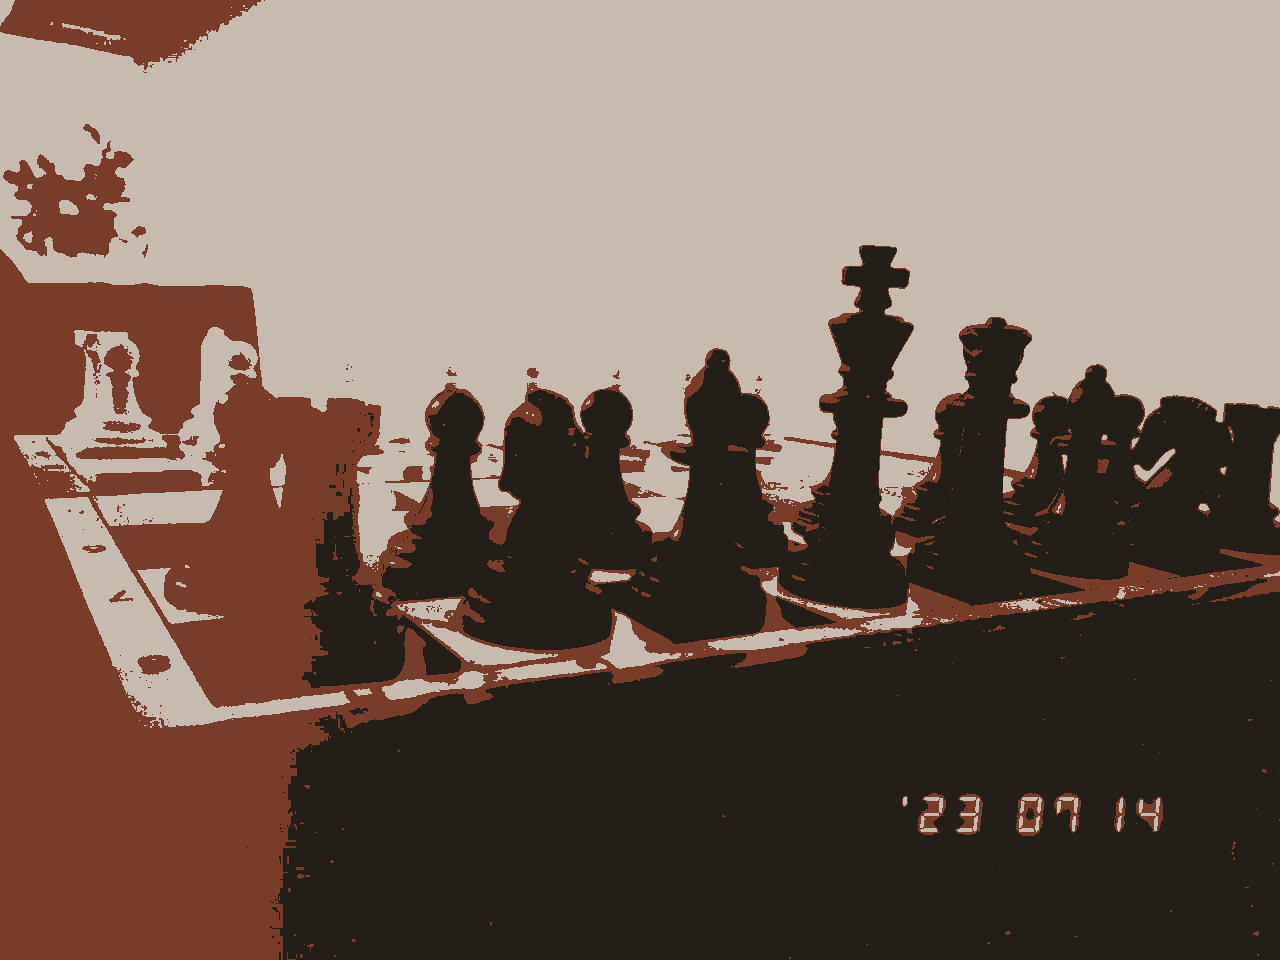

* <b> k = 5 </b>

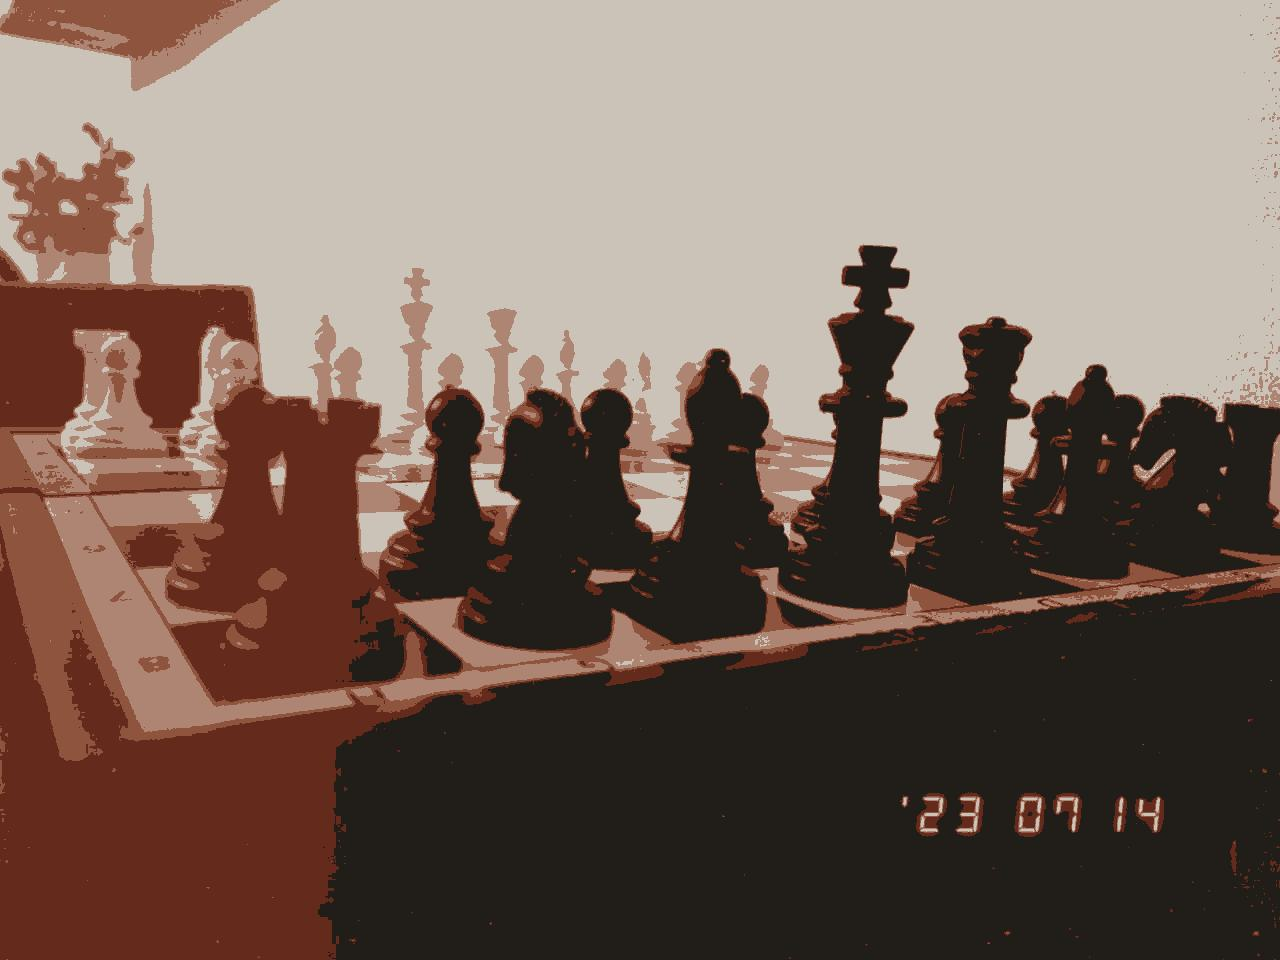

* <b> k = 7 </b>

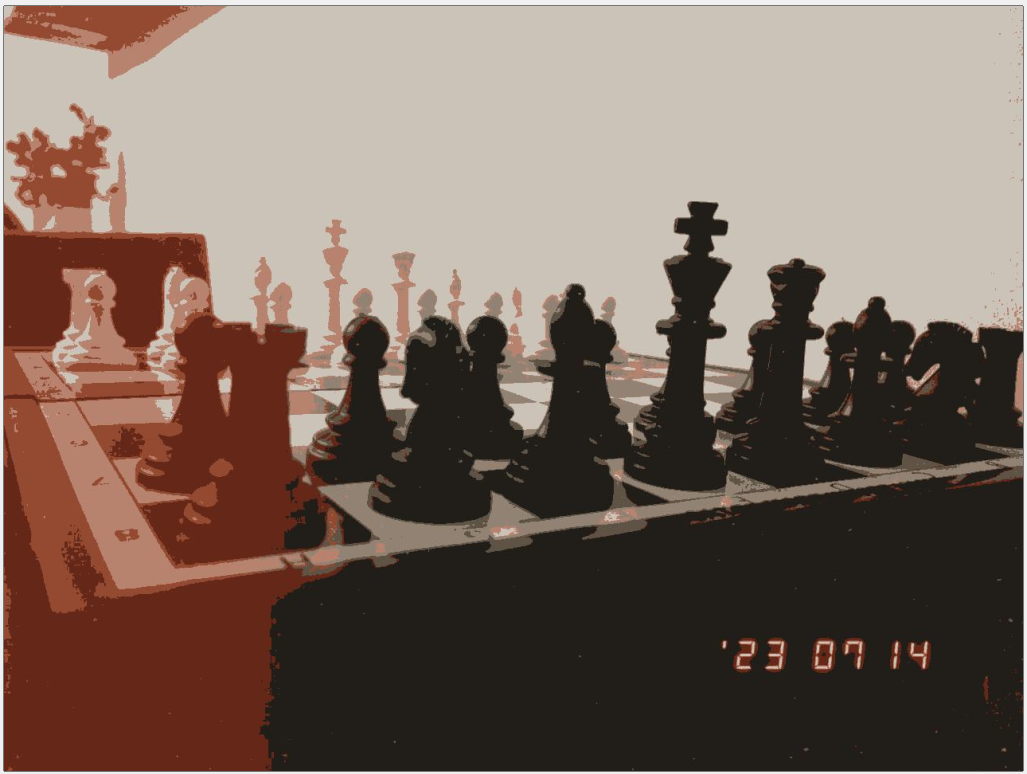

* <b> k = 10 </b>

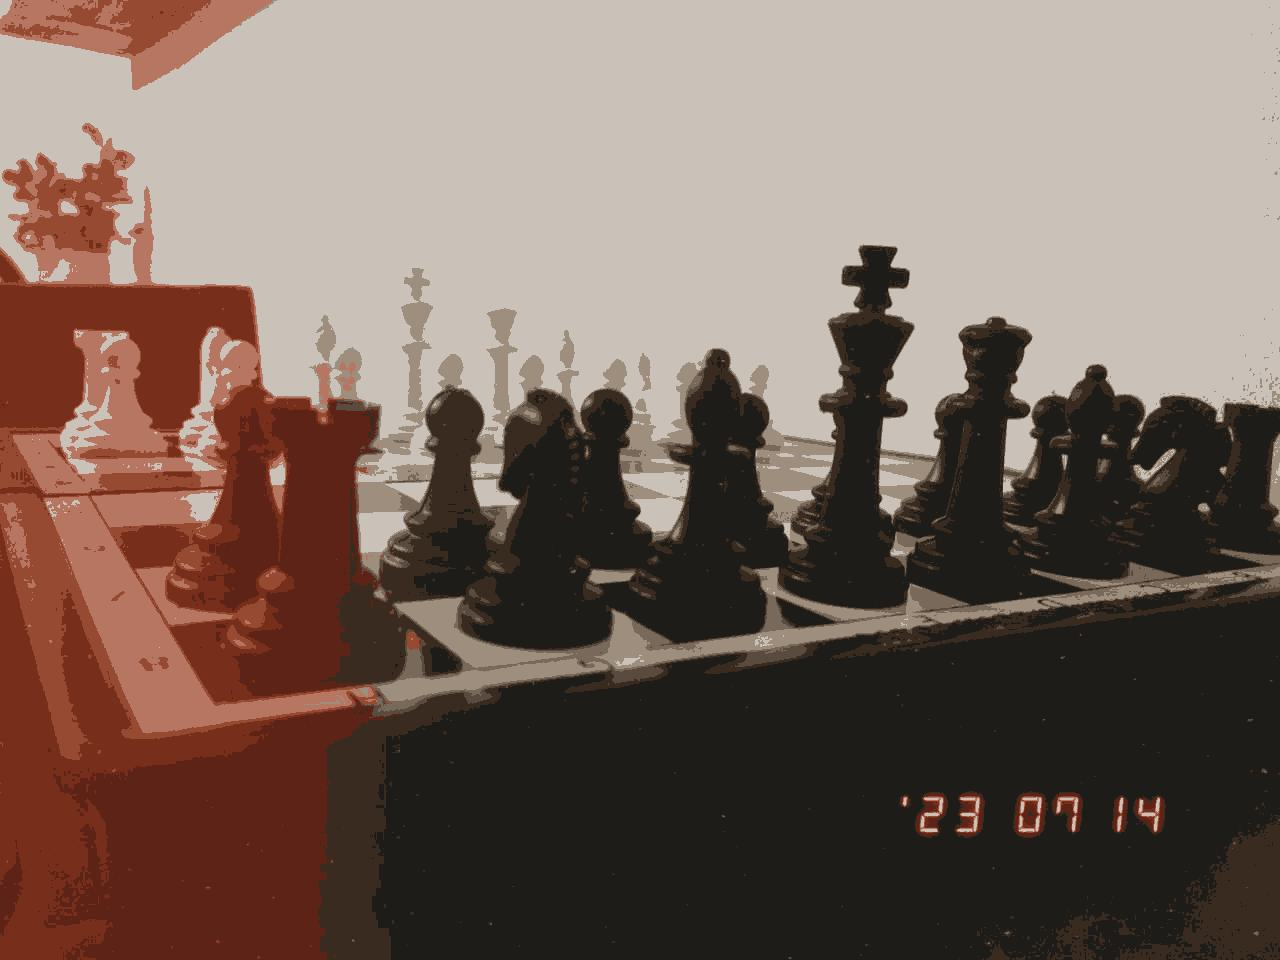

#### Max iteration = 20

* <b> k = 10 </b>

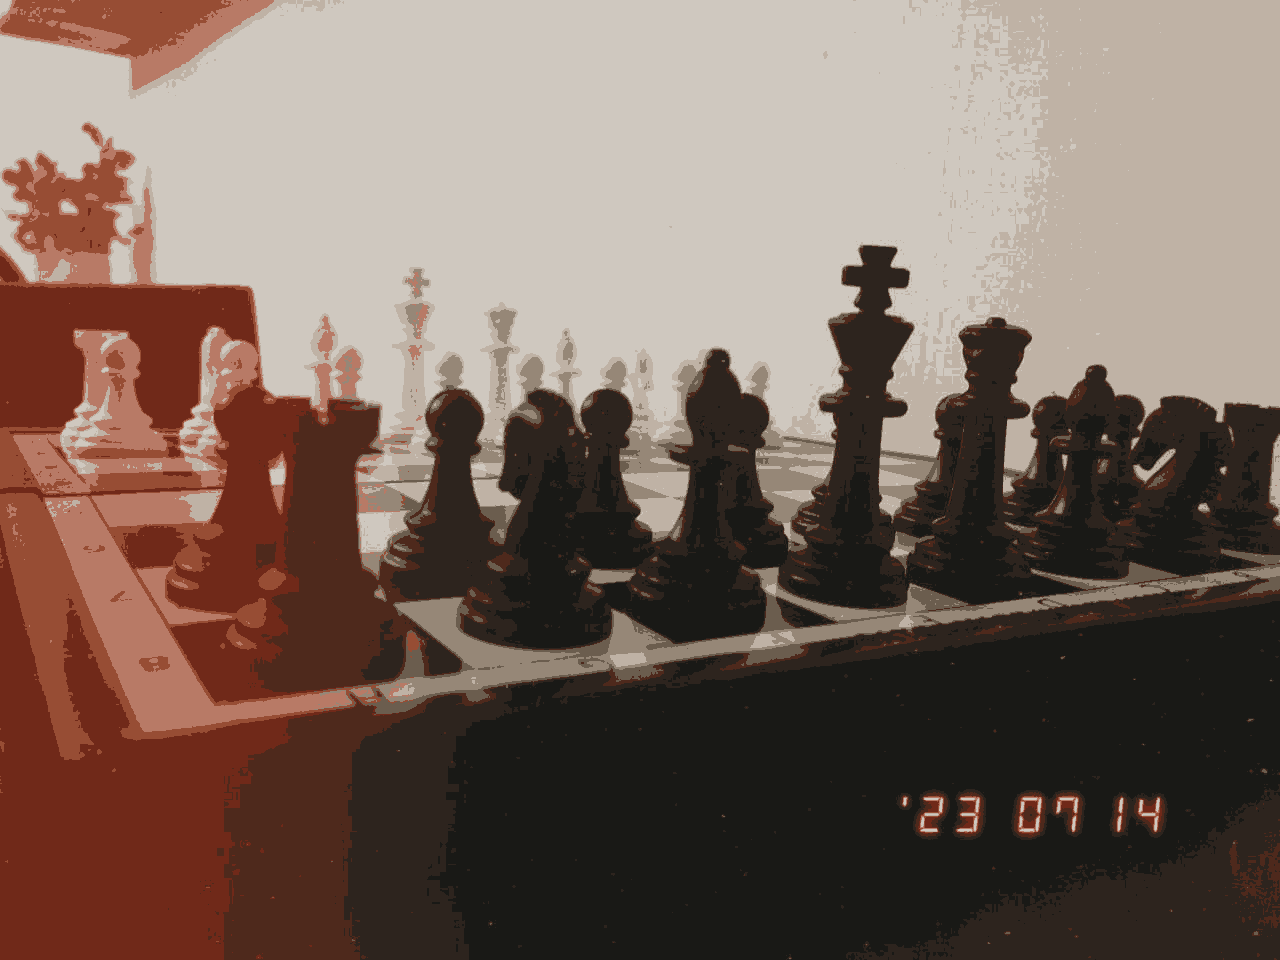

###  Nhận xét kết quả

##### Với Max Iteration = 5
* Ở <b>k = 3</b>, số màu bị hạn chế ở ba màu chính <b> xám, đen, đỏ </b>, nên hầu hết các quân cờ màu trắng bị trùng với màu nền của bức tường ở hình gốc
* Ở <b>k = 5</b>, màu <b> xám đậm </b> được thêm vào góp phần tạo ra <b>phần bóng cho các quân cờ trắng, và bóng của chậu hoa</b> ở góc tường bên trái
* Ở <b>k = 7 và k = 10</b>, không có sự khác biệt rõ về phía quân cờ màu trắng, chỉ có <b>phần đổ bóng ở các quần cờ đen, và phần đổ bóng của quân cờ xuống bàn cờ</b>  được tăng lên khi theo số lượng cluster

##### Với Max Iteration = 20 
* Ở <b>k = 10</b>, so với Max Iteration = 5, ta thấy kết quả rõ nét hơn rất nhiều, vì việc phân chia cụm được lặp lại nhiều lần hơn

** Nhìn chung, với cùng một số lượng lần lặp, khi tăng số lượng k (cluster), các phần <b>chi tiết của hình ảnh sẽ dần được rõ nét hơn</b>. Nhưng vì các centroid được lấy ngẫu nhiên nên <b>độ sắc nét của các chi tiết vẫn có dao động</b> (số cluster lớn hơn nhưng một số chi tiết lại kém sắc nét hơn, ví dụ: Với Max Iteration = 5, k = 5, k = 7, những chữ số "6,7,8" trên bàn cờ lại được thể hiện rõ hơn khi k = 10)

** Khi tăng số lượng lần lặp, ảnh sẽ cho ra kết quả phân cụm <b>gần giống so với ảnh gốc, thể hiện được thêm nhiều chi tiết và sắc nét hơn</b> dù có cùng một số lượng màu với số lần lặp ít hơn. Nhưng cùng với đó, thời gian để thi hành chương trình cũng tăng đáng kể.

## Tài liệu tham khảo

* https://machinelearningcoban.com/2017/01/01/kmeans/
* https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/